## Subnational Plotting

As we demonstrated in T1, T2, and T3, FPsim can also be used to test a variety of interventions. In this tutorial we show how it can also be used to focus on interventions during the postpartum period. This tutorial walks you through how to define parameters, run simulations, and plot the results to model subnational interventions.

##  Getting started

Installing and getting started with FPsim is quite simple.

To install, just type `pip install fpsim`. If it worked, you should be able to import FPsim with `import fpsim as fp`.

In [56]:
import fpsim as fp
import sciris as sc

### Defining parameters

The most common category of parameters to change in FPsim is the basic category. This includes the initial number of agents, the location (i.e. Senegal, Kenya, or Ethiopia), and the starting and ending years. We can define these as:

In [57]:
n_agents   = 100_000
start_year = 2000
end_year   = 2025
repeats    = 3
year       = 2010
youth_ages = ['<18', '18-20']

pars1 = fp.pars(location='amhara', n_agents=n_agents, start_year=start_year, end_year=end_year) 
pars2 = fp.pars(location='gambela', n_agents=n_agents, start_year=start_year, end_year=end_year) 
pars3 = fp.pars(location='oromia', n_agents=n_agents, start_year=start_year, end_year=end_year) 
pars4 = fp.pars(location='snnpr', n_agents=n_agents, start_year=start_year, end_year=end_year) 

do_plot = True

  Running "Oromia": 2000 of 2025 ( 0/301) (0.32 s)  ———————————————————— 0%
  Running "Gambela": 2000 of 2025 ( 0/301) (0.35 s)  ———————————————————— 0%
  Running "SNNPR": 2000 of 2025 ( 0/301) (0.32 s)  ———————————————————— 0%
  Running "Amhara": 2000 of 2025 ( 0/301) (0.37 s)  ———————————————————— 0%
  Running "SNNPR": 2001 of 2025 (12/301) (1.24 s)  ———————————————————— 4%
  Running "Gambela": 2001 of 2025 (12/301) (1.30 s)  ———————————————————— 4%
  Running "Oromia": 2001 of 2025 (12/301) (1.29 s)  ———————————————————— 4%
  Running "Amhara": 2001 of 2025 (12/301) (1.32 s)  ———————————————————— 4%
  Running "SNNPR": 2002 of 2025 (24/301) (2.24 s)  •——————————————————— 8%
  Running "Amhara": 2002 of 2025 (24/301) (2.29 s)  •——————————————————— 8%
  Running "Gambela": 2002 of 2025 (24/301) (2.32 s)  •——————————————————— 8%
  Running "Oromia": 2002 of 2025 (24/301) (2.36 s)  •——————————————————— 8%
  Running "Gambela": 2003 of 2025 (36/301) (3.34 s)  ••—————————————————— 12%
  Running 

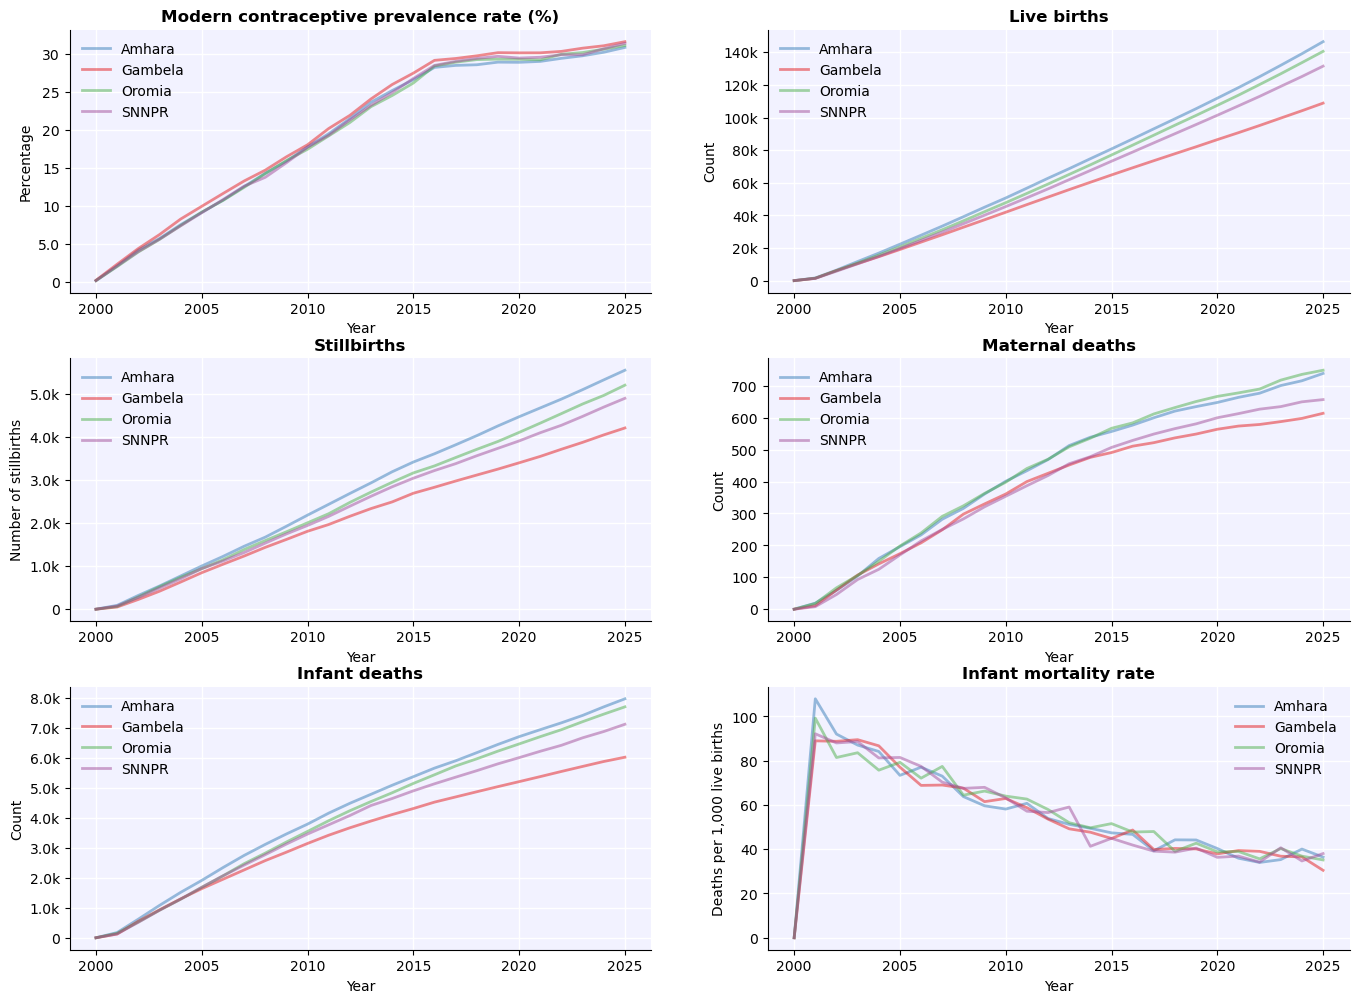

Elapsed time: 58.1 s
Done.


In [60]:
if __name__ == '__main__':
    sc.tic()

    sim1 = fp.Sim(pars=pars1, label='Amhara')
    sim2 = fp.Sim(pars=pars2, label='Gambela')
    sim3 = fp.Sim(pars=pars3, label='Oromia')
    sim4 = fp.Sim(pars=pars4, label='SNNPR')


    msim = fp.MultiSim(sims=[sim1, sim2, sim3, sim4])

    msim.run()

    if do_plot:
        msim.plot()

    sc.toc()
    print('Done.')

### Build Intervention Scenarios

Next, you'll build intervention scenarios for the postpartum period using multiple sims and plot those results. 

#### Scenario 1

First, we want injectables efficacy to increase, and second, we want that change to start in 2020. We can imagine using this kind of scenario when a user wants to <i>improve an existing method</i>, but does not think this will impact behavior. 

Let's start with a basic scenario in which we change behavior around a method - pills. We can adjust the initiation, switching, and/or discontinuation for the method. In S1, we'll double the initiation rate of the implant using `init_factor`. 

In [54]:
pars1.add_method(name='new pill', eff=0.985)


s1 = fp.make_scen(eff={'Pill':0.99}, year=2020)
s2 = fp.make_scen(method='Pill', init_factor=2, year=2020)
s2_value = fp.make_scen(method='Pill', init_value=0.07, year=2020)
s3 = s1 + s2
s4 = fp.make_scen(method='Pill', init_factor=2.0, ages='>35', year=2027)
s5 = fp.make_scen(
    year = 2027,
    probs = [
        dict(method='Pill', init_factor=2.0, ages='>35'),
        dict(source='Injectables', dest='Pill', value=0.20) #assume 20% likelihood of condom users to switch to injectables
    ]
)

scens.add_scen(s1)


In [55]:
method = 'Pill'
kw = dict(method=method, ages=youth_ages) #set kwargs to take on the method and the age group
d_kw = dict(dest=method, ages=youth_ages)
f1 = fp.make_scen(
        label = '2x uptake',
        year  = year,
        probs = [
            dict(init_factor = 2.0, **kw),
                ]
            )
f2 = fp.make_scen(
        label = '5x uptake',
        year  = year,
        probs = [
            dict(init_factor = 5.0, **kw),
                ]
            )
    
f3 = fp.make_scen(
        label = '10x uptake',
        year  = year,
        probs = [
            dict(init_factor = 10.0, **kw),
                ]
            )
f_switch = fp.make_scen(
        label = '20 percent switching',
        year  = year,
        probs = [
            dict(source = 'Injectables', value = 0.20, **d_kw)
                ]
           )

f4 = f2 + f_switch 

method = 'new pill'
kw = dict(method=method, ages=youth_ages)
f_new = fp.make_scen(
        label = 'introduce new method',
        year  = 2015, #replacing the intervention year, giving the new method a bit of a lag
        probs = [
            dict(copy_from='Injectables', **kw),
            dict(init_value=0.05, **kw),
                ]
            )

scens = fp.Scenarios(pars=pars, repeats=repeats)
scens.add_scen(label='Baseline')
scens.add_scen(f1)
scens.add_scen(f2)
scens.add_scen(f3)
scens.add_scen(f4, label = '5x uptake plus switching') #combining f2 and f_switch and re-labeling here
scens.add_scen(f_new)

scens.run()

  Running "2x uptake": 1960 of 2020 ( 0/721) (0.42 s)  ———————————————————— 0%
  Running "2x uptake": 1960 of 2020 ( 0/721) (0.42 s)  ———————————————————— 0%






  Running "2x uptake": 1961 of 2020 (12/721) (0.81 s)  ———————————————————— 2%
  Running "Baseline": 1961 of 2020 (12/721) (0.85 s)  ———————————————————— 2%
  Running "Baseline": 1961 of 2020 (12/721) (0.86 s)  ———————————————————— 2%

  Running "5x uptake": 1961 of 2020 (12/721) (0.83 s)  ———————————————————— 2%
  Running "2x uptake": 1961 of 2020 (12/721) (0.83 s)  ———————————————————— 2%
  Running "2x uptake": 1961 of 2020 (12/721) (0.90 s)  ———————————————————— 2%
  Running "5x uptake": 1961 of 2020 (12/721) (0.87 s)  ———————————————————— 2%
  Running "2x uptake": 1962 of 2020 (24/721) (1.10 s)  ———————————————————— 3%
  Running "Baseline": 1962 of 2020 (24/721) (1.15 s)  ———————————————————— 3%
  Running "5x uptake": 1962 of 2020 (24/721) (1.10 s)  ———————————————————— 3%
  Running "Baseline": 1962 of 2020 (24/721) (1.1

/Users/aasli/Documents/GitHub/fpsim/fpsim/sim.py:2626: RuntimeWarning: sc.parallelize() failed with parallelizer=None:
Key "new pill" is not a valid method
Automatically switching to more robust parallelizer 'multiprocess'. To silence this warning, set parallelizer='multiprocess'.
  sims = sc.parallelize(single_run, iterarg=sims, **kwargs)


  Running "5x uptake": 1960 of 2020 ( 0/721) (0.37 s)  ———————————————————— 0%
  Running "Baseline": 1960 of 2020 ( 0/721) (0.44 s)  ———————————————————— 0%

  Running "Baseline": 1960 of 2020 ( 0/721) (0.44 s)  ———————————————————— 0%



  Running "5x uptake": 1960 of 2020 ( 0/721) (0.40 s)  ———————————————————— 0%
  Running "5x uptake": 1961 of 2020 (12/721) (0.85 s)  ———————————————————— 2%


  Running "2x uptake": 1961 of 2020 (12/721) (0.89 s)  ———————————————————— 2%
  Running "Baseline": 1961 of 2020 (12/721) (0.94 s)  ———————————————————— 2%


  Running "5x uptake": 1961 of 2020 (12/721) (0.95 s)  ———————————————————— 2%
  Running "2x uptake": 1962 of 2020 (24/721) (1.14 s)  ———————————————————— 3%
  Running "5x uptake": 1962 of 2020 (24/721) (1.13 s)  ———————————————————— 3%


  Running "Baseline": 1962 of 2020 (24/721) (1.21 s)  ———————————————————— 3%
  Running "2x uptake": 1962 of 2020 (24/721) (1.20 s)  ———————————————————— 3%
  Running "2x uptake": 1962 of 2020 (24/721) (

KeyNotFoundError: Key "new pill" is not a valid method

#### Scenario 2

Now let's say we think that the newly improved implant will especially appeal to the 35+ audience when it hits the market in 2027. We would specify the age matrix using 'ages'.

In [35]:
s2 = fp.make_scen(method='Implants', init_factor=2.0, ages='>35', year=2027)

#### Scenario 3

We can also combine different changes in a single scenario by using a dictionary. In this case, let's imagine that our newly improved 2027 injectables will appeal to the 35+ audience and will draw not only new users, but current condom users. In this case, we need two lines of changes, one line to affect injectables, and one to affect condom switching behavior.

In [36]:
s3 = fp.make_scen(
    year = 2027,
    probs = [
        dict(method='Implants', init_factor=2.0, ages='>35'),
        dict(source='Injectables', dest='Implants', value=0.20) #assume 20% likelihood of condom users to switch to injectables
    ]
)

Now that we've run the scenarios, we have a 'scens' object that we want to examine, and we'll do that first by plotting the results. The default plotting is simply plot(), which will show mCPR, live births, stillbirths, maternal deaths, infant deats, and the infant mortality rate. If you have more than one 'repeat', you'll see each scenario has a line and a confidence band. 

In [37]:
scens.plot()

NameError: name 'scens' is not defined

plot() is the same whether you run a single sim (sim.plot()) or multiple scenarios (scens.plot()). So, it has the same options beyond the default as we explored in T2. 

* <i>'cpr'</i> will plot three different ways to define contraceptive prevalence - mCPR, CPR (includes traditional), and aCPR (includes traditional and restricts denominator to sexually active non-pregnant women) <br>
* <i>'apo'</i> will plot adverse pregnancy outcomes, including abortion and miscarriage <br>
* <i>'mortality'</i> will plot mortality-related outcomes <br>
* <i>'method'</i> plots the method mix, including any new methods you've introduced in the scenarios.  <br>

Let's take a look at the 'method' option. 

In [ ]:
scens.plot('method')

## Customize plotting

Users can customize FPsim plots by contributing new code defining new plot options to our shared codebase. However, if you only want to customize the appearance of existing plots, you can easily add a few lines of code after you've run your scenarios. 

You may want to zoom in on some plots, for instance, to the point of intervention, which you can do in iptyhon's interactive setting. Or you can limit the x-axis when you call the plot. This is particularly helpful if you're calling multiple plots and you want them all to match, without too much fiddling required on your end.

To do this, we simply need to save the figures and write a quick for loop to set the x-axis limits. 

In [ ]:
method_fig = scens.plot('method')
apo_fig = scens.plot('apo')
for fig in [method_fig, apo_fig]:
                for ax in fig.axes:
                    ax.set_xlim(left = 2012, 
                                right = 2020)

You may also want to set custom color schemes for your plots. In Python, you can input HTML color codes into a custom color dictionary: 

In [ ]:
colors = {
    'None'              : [0.0, 0.0, 0.0],
    'Withdrawal'        : [0.3, 0.3, 0.3],
    'Other traditional' : [0.5, 0.5, 0.5],
    'Condoms'           : [0.7, 0.7, 0.7],
    'Pill'              : [0.3, 0.8, 0.9],
    'Injectables'       : [0.6, 0.4, 0.9],
    'Implants'          : [0.4, 0.2, 0.9],
    'IUDs'              : [0.0, 0.0, 0.9],
    'BTL'               : [0.8, 0.0, 0.0],
    'Other modern'      : [0.8, 0.5, 0.5],
    'new condoms'       : [0.7, 0.8, 0.7],
    'new implants'      : [0.5, 0.8, 0.5],
    'new injectables'   : [0.2, 0.8, 0.2],
}

Then we can apply the color dictionary to our method mix plot: 

In [ ]:
scens.plot('method', colors = colors)

To further customize your own plots, you can always download the dataframe and selected output to a .csv file, and export to your preferred environment. We've used this method for a wide range of quick analyses, from creating pivot tables in excel to custom plots using ggplot2 in R. 

In [48]:
df = scens.msim.to_df()
df.to_csv(r'T4_scenario_output.csv')

This concludes the FPsim tutorials. We look forward to seeing what you create using this tool!